1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='features_1', ylabel='features_3'>

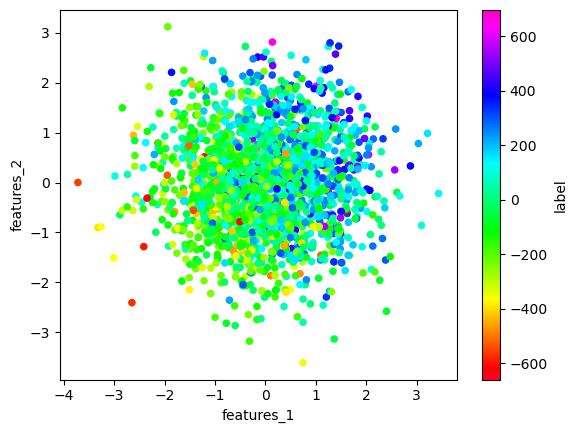

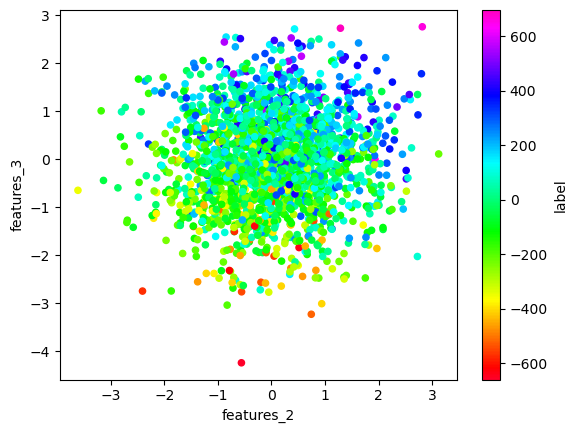

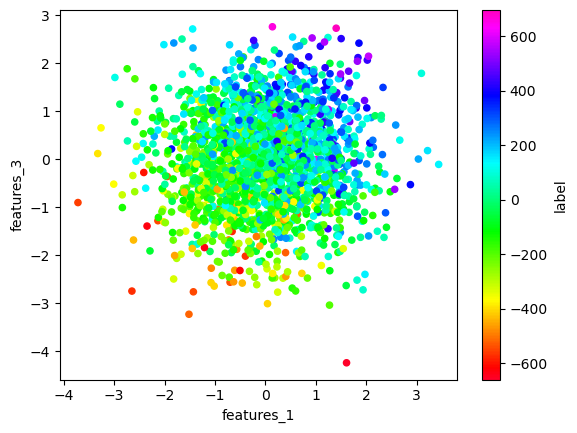

In [24]:
import pandas as pd

data = pd.read_csv("data/regression_generated.csv")

data.plot.scatter( x = 'features_1' , y = 'features_2', c= 'label' ,colormap = 'gist_rainbow')
data.plot.scatter( x = 'features_2' , y = 'features_3', c= 'label' ,colormap = 'gist_rainbow')
data.plot.scatter( x = 'features_1' , y = 'features_3', c= 'label' ,colormap = 'gist_rainbow')


There is a week correlation.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

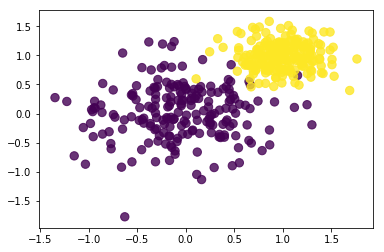

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

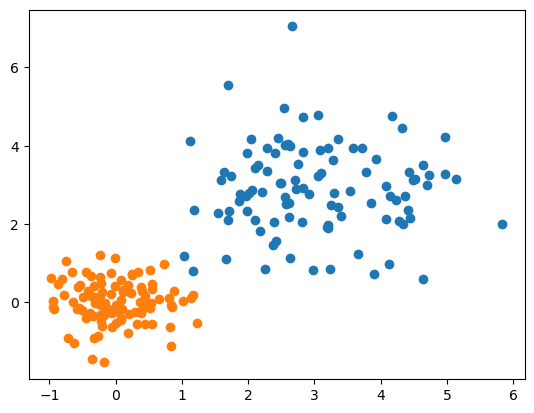

In [5]:

def gaussian(mean,std) : 
    return np.random.normal(mean,std,100)

x1 = gaussian(3,1)
y1 = gaussian(3,1)
plt.scatter(x1,y1)

x2 = gaussian(0,0.5)
y2 = gaussian(0,0.5)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

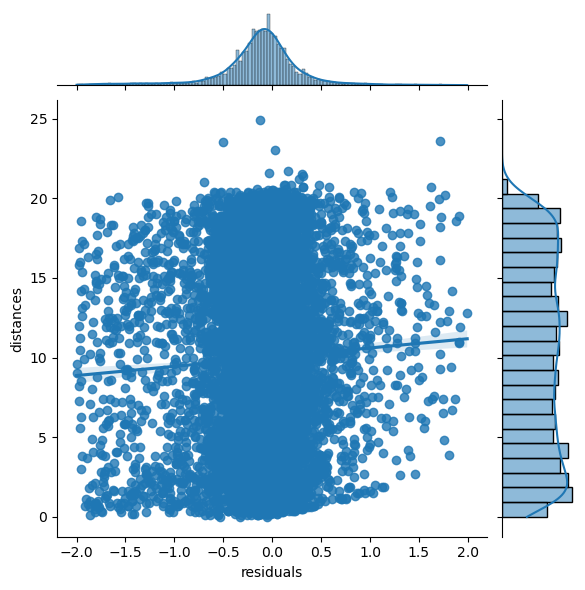

In [30]:
import seaborn as sns

data = pd.read_pickle("data/residuals_261.pkl")

# data_dic is necessary because of pickle file
data_dic = pd.DataFrame(data[()])
arr =  data_dic[abs(data_dic['residuals']) <= 2]
sns.jointplot(data = arr, x = 'residuals', y='distances', kind ='reg')


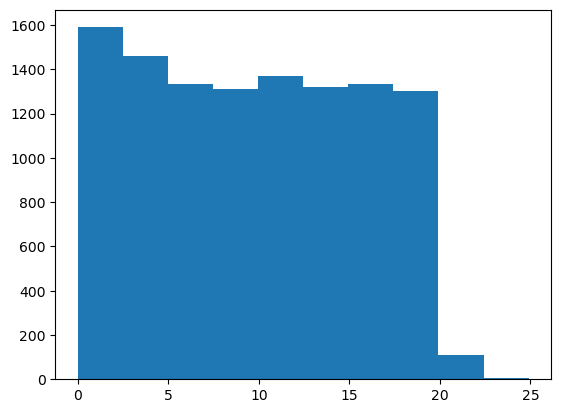

[ 0.    2.49  4.98  7.47  9.96 12.45 14.94 17.43 19.92 22.41 24.9 ]
12.449999999999989
0.0


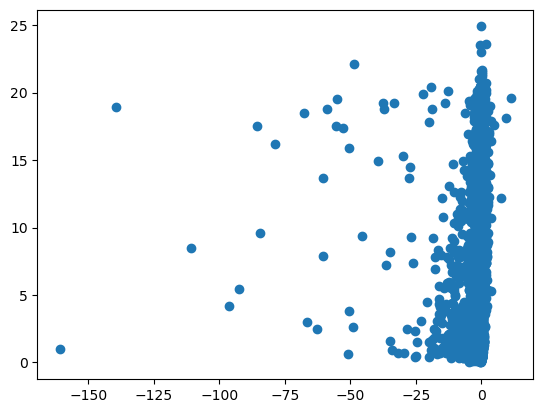

In [48]:
# histogram of histogram
distances =  data_dic['distances']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(distances)
plt.show()

x = bins
y = bins.mean()
err_y = y.std()

print(x)
print(y)
print(err_y)

residuals = data_dic['residuals']
plt.scatter(residuals, distances)


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


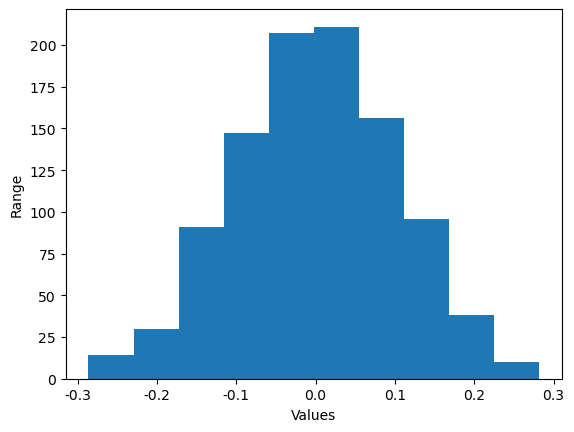

In [50]:
from matplotlib.ticker import FormatStrFormatter
# Filling a numpy array x of length N with a variable normally distributed, with a given mean and standard deviation

mean = 0
std = 0.1
N = 1000
x = np.random.normal(mean, std, N)

fig, ax = plt.subplots()
counts, bins, patches = ax.hist(x)

ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.ylabel('Range')
plt.xlabel('Values')
plt.show()